In [4]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

In [5]:
# np.expand_dims??

In [6]:
df = pd.read_csv('C:\\Users\\Yash Bhagwani\\Desktop\\Comment Toxicity Model\\Data\\train.csv')

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [9]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df.iloc[5]['comment_text']

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [11]:
df.iloc[63]['comment_text']

'"\n\n""Christian arabs""\nHi. Could you please stop enforcing the category ""Christian arabs"" on non arabic Christians living in the middle east? This is wrong. We middle-eastern Christians, though not arabs, have gone through Arabization, and that needs to stop. We are not arabs. We have our own ethnicity, and we shouldn\'t be forced to be called ""Christian arabs"". If a Christian European is born in the middle east, should he be called a ""Christian arab"" because of that reason alone? Please understand, they are Syriac Christians (i.e. of Assyrian ancestry), and most of them speak Aramaic, though a lot of them are forgetting it. As someone who speaks Aramaic, you should respect this fact, and not appease muslims who want to call everyone arabs just because they\'re in the middle east. We are not closely related to the arabs from Saudiarabia. We have our own ethnicity, please stop forcing upon us some alien arab ethnicity. That\'s oppression. |Talk 12:17 26 Jun, 2007 (UTC)"'

In [12]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [13]:
df[df.columns[2:]].iloc[63]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 63, dtype: int64

In [14]:
df.iloc[179]['comment_text']

"REPLY ABOVE:\nThat was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yangtze Han Chinese, not the fringe indigenous tribes in Guangzhou/Guangxi). \n\nJust admit that you vietnamese are all a bunch of wannabe crap people. ALL the east asian people I've spoken to thinks of Vietnam as a very integral part of SEA, and we all think you're backward, dirty and speak in a horrible swearing language. Doesn't matter what crap you spout on Wikipedia, won't change the way people in the real world think."

In [15]:
df[df.columns[2:]].iloc[179]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           1
identity_hate    0
Name: 179, dtype: int64

Well inorder to find specific type of comments i.e, let's say we want comment which is toxic. So what we can do is use...

In [16]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [17]:
df.iloc[6]['comment_text'] # Toxicity can be observed clearly

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

## 1. Preprocess the Data

In [18]:
from tensorflow.keras.layers import TextVectorization

In [19]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [20]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [21]:
# Slicing since we want everything after first two columns. And use .values to convert it into
# numpy array. 
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [22]:
# Converting to numpy array
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [23]:
MAX_FEATURES = 200000 # number of words in the vocab

In [24]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800, # No. of words in sentence will be capped to 1800 words
                               output_mode='int')

In [25]:
type(X)

pandas.core.series.Series

In [26]:
type(X.values)

numpy.ndarray

In [27]:
vectorizer.adapt(X.values)

In [28]:
TextVectorization??

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs,
)
Source:        
@keras_export(
    "keras.layers.TextVectorization",
    "keras.layers.experimental.preprocessing.TextVectorization",
    v1=[],
)
class TextVectorization(base_preprocessing_layer.PreprocessingLayer):
    """A preprocessing layer which maps text features to integer sequences.

    This layer has basic options for managing text in a Keras model. It
    transforms a batch of strings (one example = one string) into either a list
    of token indices (one example = 1D tensor of integer token indices) or a
    dense representation (one example = 1D tensor of float values representing
    data about the example's tokens). This layer is 

In [29]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [30]:
vectorizer('Hi guys, welcome to my stream')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([171, 654, 191, ...,   0,   0,   0], dtype=int64)>

In [31]:
vectorizer('Hi guys, welcome to my stream')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([171, 654, 191,   3,  29], dtype=int64)>

In [32]:
vectorized_text = vectorizer(X.values)

In [33]:
vectorized_text # 159571 = no. of examples, 1800 is the no. of words per sentence

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [34]:
# MCSHBAP(for creating a tensorflow pipeline) -> Map, Cache, Shuffle, Batch, Prefetch
# Instantiate: from_tensor_slices, list_file

# Let's create a tensorflow pipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # Helps bottlenecks

In [35]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [36]:
batch_X.shape

(16, 1800)

In [37]:
batch_y.shape

(16, 6)

In [38]:
len(dataset) # This is actually the number of batches that we have created

9974

In [39]:
len(dataset)*16 # Number of samples

159584

In [40]:
# Now number of batches for training
int(len(dataset)* .7)

6981

In [41]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # 70 percent batch ko skip karna hai and uske baad bache hue 30 percent data mey se 20 percent batch ko validation banana hai.
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # 90 percent batch ko skip karna hai and bache hue 10 percent mey se purey 10 percent batch ko test banana hai

In [42]:
len(train), len(val), len(test)

(6981, 1994, 997)

In [43]:
train_generator = train.as_numpy_iterator()

In [44]:
train_generator.next()

(array([[    23,      7,     39, ...,      0,      0,      0],
        [    26,   1500,     12, ...,      0,      0,      0],
        [   972,    922, 154042, ...,      0,      0,      0],
        ...,
        [     8,     74,     15, ...,      0,      0,      0],
        [    46,    476,    404, ...,      0,      0,      0],
        [     6,    241,     43, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

## 2. Create a Sequential Model

In [45]:
# Let's build a model

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_FEATURES+1, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')), # 32 different lstm units, used bidirectional layer(imp in nlp)
    tf.keras.layers.Dense(128, activation='relu'), # Feature extractor, Fully connected layers
    tf.keras.layers.Dense(256, activation='relu'), # Feature extractor, Fully connected layers
    tf.keras.layers.Dense(128, activation='relu'), # Feature extractor, Fully connected layers
    tf.keras.layers.Dense(6, activation='sigmoid') # Output layer5
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam())

# 3. Fit the model
history = model.fit(train, epochs=1, validation_data=val, verbose=1)

6981/6981 [==============================] - 2462s 352ms/step - loss: 0.0630 - val_loss: 0.0455


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [47]:
history.history

{'loss': [0.06303972750902176], 'val_loss': [0.04549768939614296]}

In [48]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

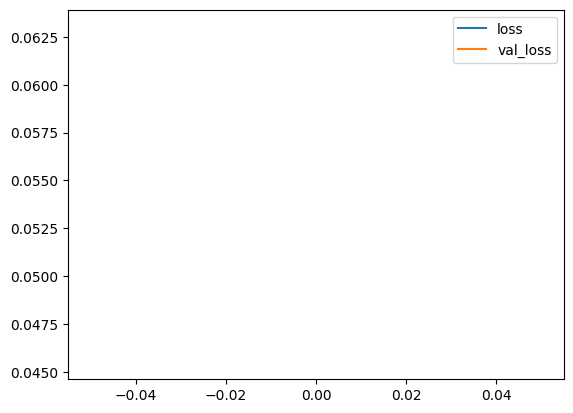

In [49]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## 3. Make Predictions

In [50]:
input_text = vectorizer("You freaking suck! I am going to hit you.")

In [51]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [52]:
batch = test.as_numpy_iterator().next()

In [53]:
test.as_numpy_iterator().next()

(array([[  377,   377,   377, ...,     0,     0,     0],
        [  758, 49026,  4906, ...,     0,     0,     0],
        [ 1108,  1903,     5, ...,     0,     0,     0],
        ...,
        [   23,    48,  5282, ...,     0,     0,     0],
        [  288, 66028,     5, ...,     0,     0,     0],
        [  165,   148,     5, ...,     0,     0,     0]], dtype=int64),
 array([[1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [54]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [55]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0], dtype=int64)>

In [56]:
# model.predict(np.expand_dims(input_text, 0))
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 783ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 47ms/step


In [ ]:
res = model.predict(batch_X)

In [ ]:
res

In [ ]:
res.shape

## 4. Evaluate the model

In [58]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [62]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 65ms/step


In [68]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()} ')

Precision:0.8011804819107056,Recall:0.7112832069396973, Accuracy:0.45336008071899414 


## 5. Test and Gradio

In [82]:
import gradio as gr

In [83]:
model.save('chat_toxicity.h5')

In [84]:
model = tf.keras.models.load_model('chat_toxicity.h5')

In [85]:
input_str = vectorizer('Hey I freaking hate you! I am coming after you. I will destroy you!')

In [86]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 733ms/step


In [87]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [88]:
res

array([[0.84813046, 0.03394741, 0.47514808, 0.02214389, 0.4152128 ,
        0.07713017]], dtype=float32)

In [89]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [90]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
        
    return text

In [91]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

In [92]:
interface.launch(share=True)